In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [144]:
data = pd.read_csv("4w.csv")

Features and Target variables

In [145]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# HV and LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W']].values

target = data['SD'].values

Normalize data

In [146]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [147]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [148]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [149]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800


15/15 [==============================] - 2s 24ms/step - loss: 477.3961 - val_loss: 497.2035
Epoch 2/800
15/15 [==============================] - 0s 5ms/step - loss: 467.1069 - val_loss: 473.4735
Epoch 3/800
15/15 [==============================] - 0s 5ms/step - loss: 394.1308 - val_loss: 229.5446
Epoch 4/800
15/15 [==============================] - 0s 5ms/step - loss: 88.1513 - val_loss: 66.0613
Epoch 5/800
15/15 [==============================] - 0s 5ms/step - loss: 51.0969 - val_loss: 64.5944
Epoch 6/800
15/15 [==============================] - 0s 5ms/step - loss: 46.0966 - val_loss: 52.0489
Epoch 7/800
15/15 [==============================] - 0s 5ms/step - loss: 44.9734 - val_loss: 50.6582
Epoch 8/800
15/15 [==============================] - 0s 5ms/step - loss: 45.3542 - val_loss: 50.1957
Epoch 9/800
15/15 [==============================] - 0s 5ms/step - loss: 46.7521 - val_loss: 66.6591
Epoch 10/800
15/15 [==============================] - 0s 4ms/step - loss: 50.0643 - val_loss: 49

Visualize LSTM results

0.6322483640933315


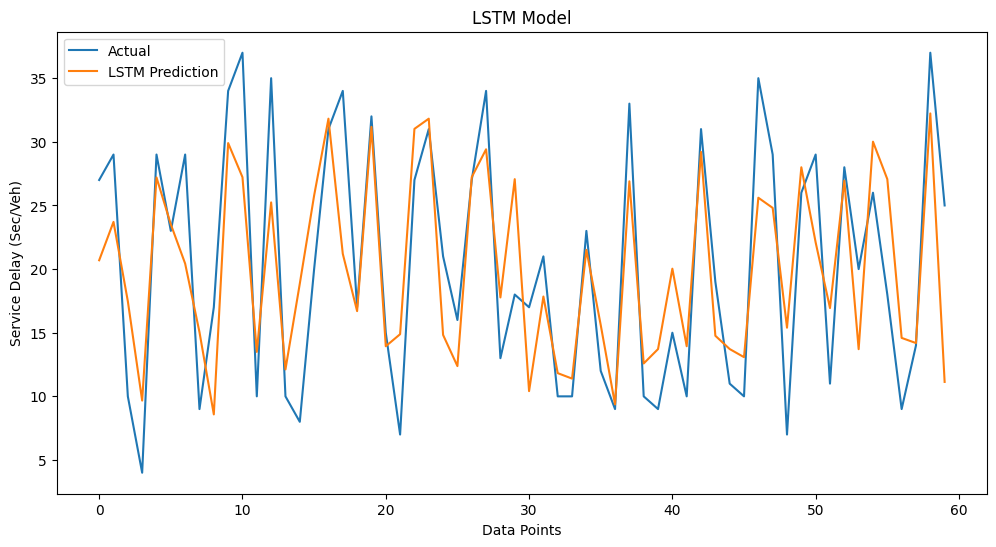

In [150]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [151]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/600
15/15 [==============================] - 3s 54ms/step - loss: 474.6451 - val_loss: 488.1486
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 434.7036 - val_loss: 351.9160
Epoch 3/600
15/15 [==============================] - 0s 6ms/step - loss: 164.4426 - val_loss: 81.0236
Epoch 4/600
15/15 [==============================] - 0s 6ms/step - loss: 67.7304 - val_loss: 76.2070
Epoch 5/600
15/15 [==============================] - 0s 6ms/step - loss: 46.1692 - val_loss: 51.8633
Epoch 6/600
15/15 [==============================] - 0s 6ms/step - loss: 43.4207 - val_loss: 47.5218
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 42.0654 - val_loss: 53.4399
Epoch 8/600
15/15 [==============================] - 0s 7ms/step - loss: 41.6213 - val_loss: 46.7475
Epoch 9/600
15/15 [==============================] - 0s 6ms/step - loss: 41.1832 - val_loss: 46.1736
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 45.9043 - v

Visualize BiLSTM results

0.6374060883769294


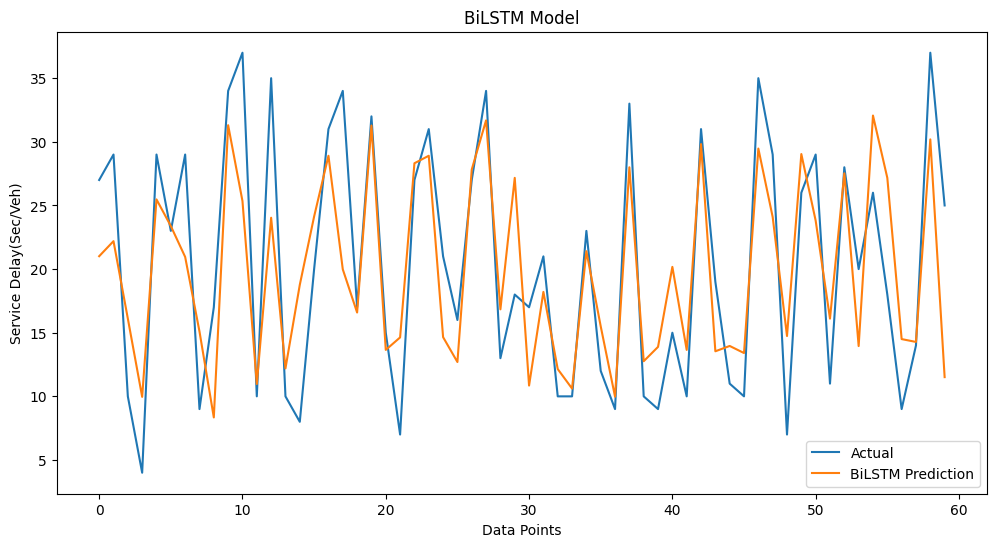

In [152]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [153]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
15/15 [==============================] - 2s 28ms/step - loss: 469.4831 - val_loss: 476.4176
Epoch 2/800
15/15 [==============================] - 0s 5ms/step - loss: 419.3818 - val_loss: 364.3902
Epoch 3/800
15/15 [==============================] - 0s 6ms/step - loss: 174.6990 - val_loss: 123.3519
Epoch 4/800
15/15 [==============================] - 0s 6ms/step - loss: 59.7479 - val_loss: 50.8402
Epoch 5/800
15/15 [==============================] - 0s 6ms/step - loss: 45.9602 - val_loss: 46.6323
Epoch 6/800
15/15 [==============================] - 0s 6ms/step - loss: 44.7212 - val_loss: 48.1535
Epoch 7/800
15/15 [==============================] - 0s 4ms/step - loss: 41.3103 - val_loss: 47.1725
Epoch 8/800
15/15 [==============================] - 0s 4ms/step - loss: 43.6164 - val_loss: 49.3134
Epoch 9/800
15/15 [==============================] - 0s 4ms/step - loss: 42.4733 - val_loss: 48.4422
Epoch 10/800
15/15 [==============================] - 0s 4ms/step - loss: 41.9560 - 

Visualize GRU results

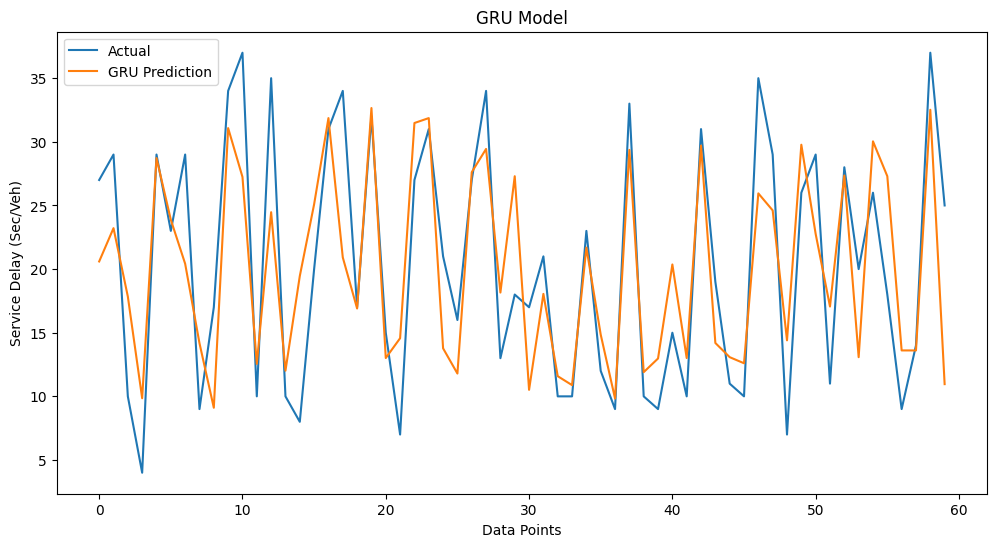

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [155]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/600
15/15 [==============================] - 3s 40ms/step - loss: 472.6235 - val_loss: 482.8053
Epoch 2/600
15/15 [==============================] - 0s 8ms/step - loss: 432.4970 - val_loss: 385.0706
Epoch 3/600
15/15 [==============================] - 0s 7ms/step - loss: 188.9120 - val_loss: 127.9992
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 54.3757 - val_loss: 53.0928
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 40.3668 - val_loss: 47.6121
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 43.7419 - val_loss: 44.3838
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 41.4583 - val_loss: 42.5024
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 39.9824 - val_loss: 42.2147
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 40.1836 - val_loss: 42.0782
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 40.6437 - 

Visualize BiGRU results

0.6399840088843824


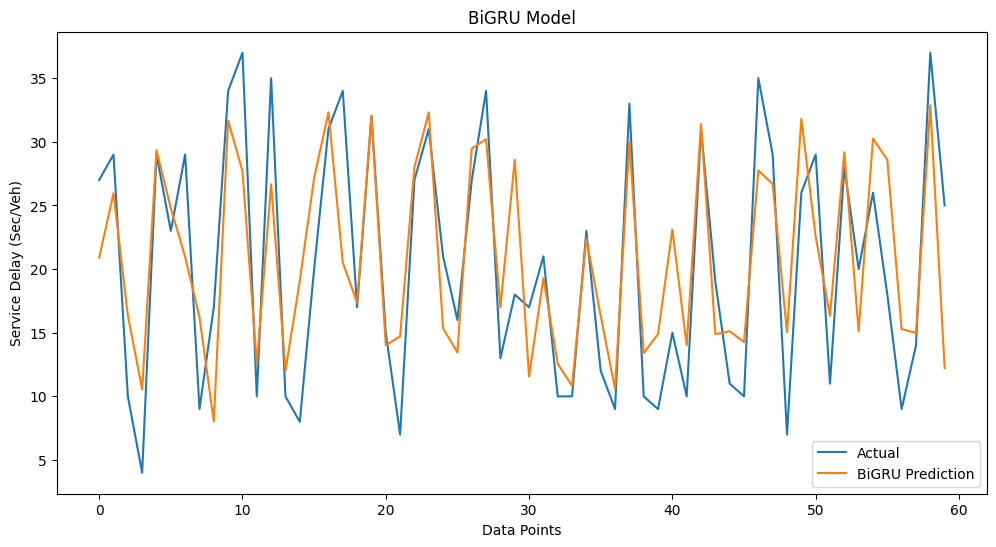

In [156]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [157]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
15/15 [==============================] - 1s 12ms/step - loss: 461.8929 - val_loss: 460.1694
Epoch 2/800
15/15 [==============================] - 0s 3ms/step - loss: 408.5336 - val_loss: 380.8723
Epoch 3/800
15/15 [==============================] - 0s 3ms/step - loss: 304.2784 - val_loss: 241.1067
Epoch 4/800
15/15 [==============================] - 0s 3ms/step - loss: 159.7539 - val_loss: 88.9942
Epoch 5/800
15/15 [==============================] - 0s 4ms/step - loss: 57.1866 - val_loss: 43.4864
Epoch 6/800
15/15 [==============================] - 0s 4ms/step - loss: 44.3451 - val_loss: 44.5423
Epoch 7/800
15/15 [==============================] - 0s 4ms/step - loss: 42.8801 - val_loss: 42.8592
Epoch 8/800
15/15 [==============================] - 0s 4ms/step - loss: 41.6951 - val_loss: 42.4492
Epoch 9/800
15/15 [==============================] - 0s 4ms/step - loss: 41.6918 - val_loss: 42.1804
Epoch 10/800
15/15 [==============================] - 0s 5ms/step - loss: 41.2191 -

Visualize CNN results

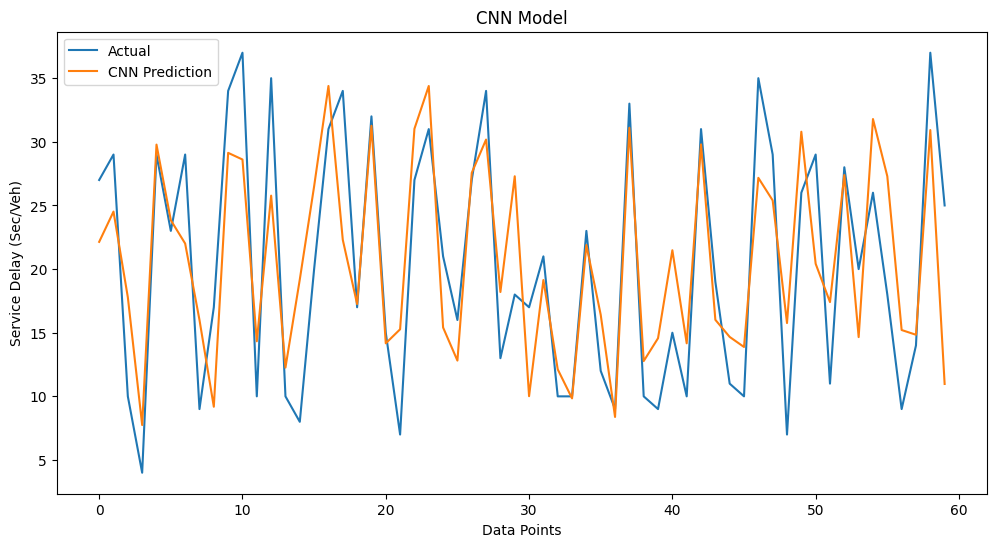

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [159]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
15/15 [==============================] - 1s 14ms/step - loss: 474.4710 - val_loss: 489.9426
Epoch 2/800
15/15 [==============================] - 0s 4ms/step - loss: 454.0791 - val_loss: 447.2394
Epoch 3/800
15/15 [==============================] - 0s 3ms/step - loss: 363.2532 - val_loss: 217.0402
Epoch 4/800
15/15 [==============================] - 0s 4ms/step - loss: 96.8571 - val_loss: 109.7649
Epoch 5/800
15/15 [==============================] - 0s 3ms/step - loss: 56.1013 - val_loss: 55.2705
Epoch 6/800
15/15 [==============================] - 0s 3ms/step - loss: 45.7505 - val_loss: 57.4077
Epoch 7/800
15/15 [==============================] - 0s 3ms/step - loss: 43.4270 - val_loss: 49.3056
Epoch 8/800
15/15 [==============================] - 0s 3ms/step - loss: 42.7348 - val_loss: 49.4456
Epoch 9/800
15/15 [==============================] - 0s 3ms/step - loss: 41.4028 - val_loss: 46.6762
Epoch 10/800
15/15 [==============================] - 0s 4ms/step - loss: 41.4145 -

Visualize CNN_LSTM results

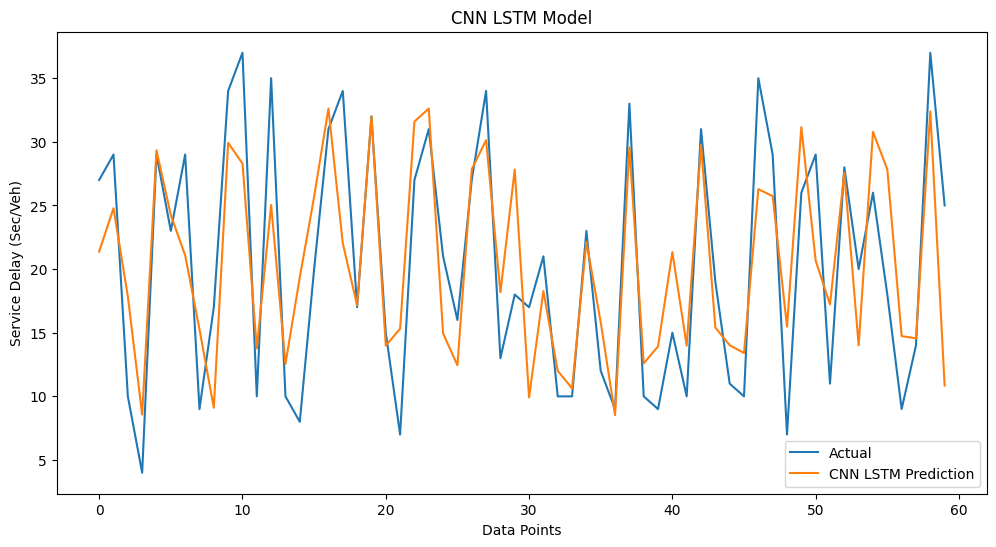

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [170]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=600, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/600
15/15 [==============================] - 1s 20ms/step - loss: 472.5708 - val_loss: 484.8626
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 444.1459 - val_loss: 429.6268
Epoch 3/600
15/15 [==============================] - 0s 3ms/step - loss: 328.7508 - val_loss: 180.7171
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 88.3929 - val_loss: 91.3823
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 55.8932 - val_loss: 58.5035
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 52.3276 - val_loss: 56.3913
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 46.9298 - val_loss: 50.7507
Epoch 8/600
15/15 [==============================] - 0s 3ms/step - loss: 46.6137 - val_loss: 48.3308
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 43.5057 - val_loss: 47.9372
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 44.0384 - 

Visualize CNN_BiLSTM results

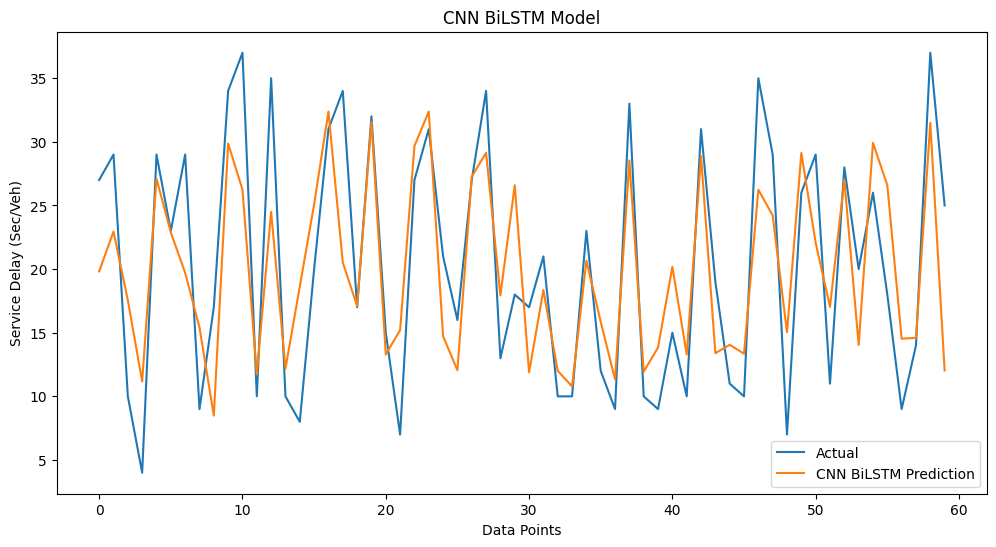

In [171]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [172]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

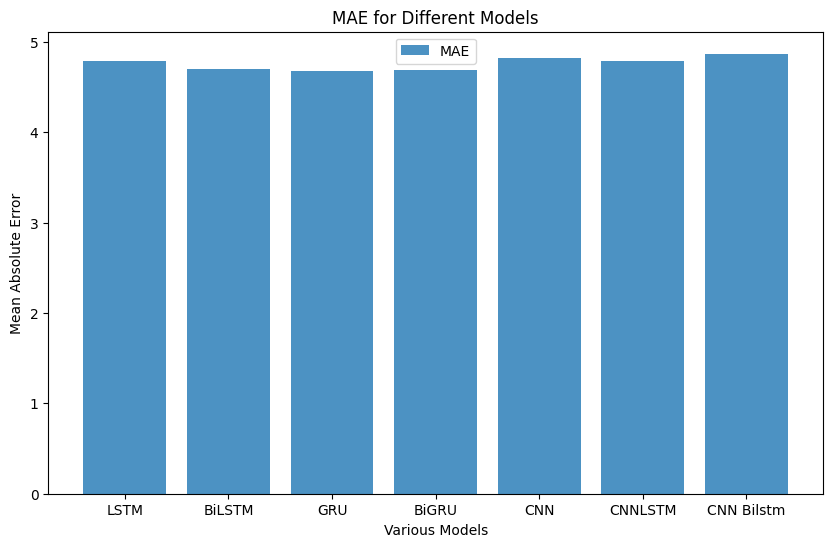

In [173]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

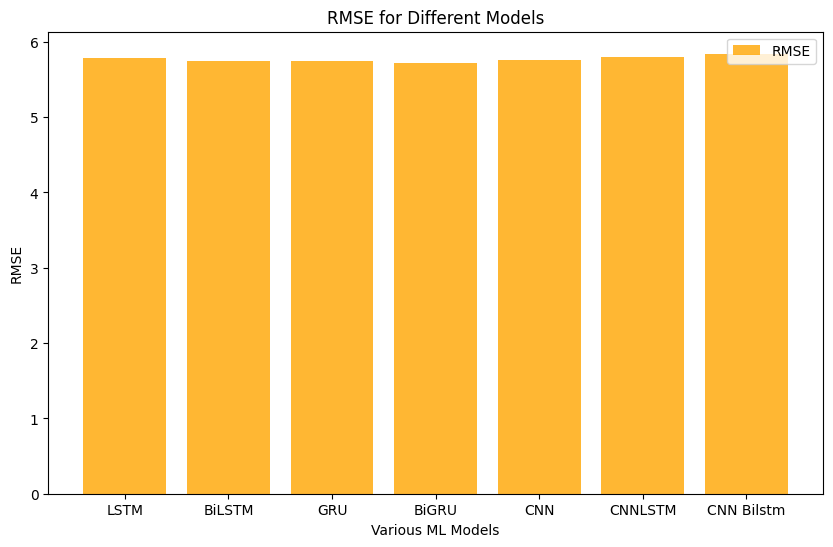

In [174]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

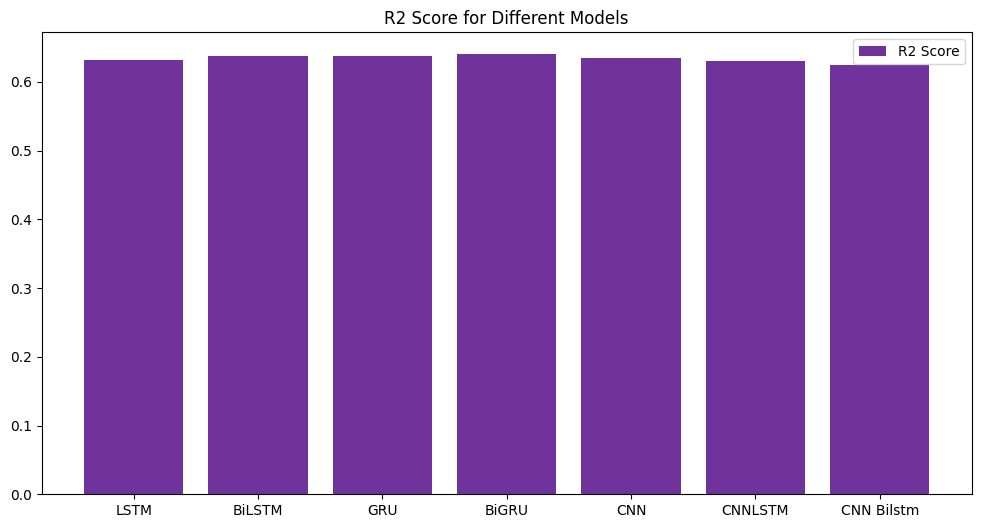

In [175]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [176]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 4.787194983164469
LSTM MSE: 5.782067209941029
LSTM R2 Score: 0.6322483640933315

BiLSTM MAE: 4.699471759796142
BiLSTM MSE: 5.741377230739445
BiLSTM R2 Score: 0.6374060883769294

GRU MAE: 4.676111570994059
GRU MSE: 5.746049319838244
GRU R2 Score: 0.636815721196639

BiGRU MAE: 4.6839123090108234
BiGRU MSE: 5.7209311962582445
BiGRU R2 Score: 0.6399840088843824

CNN MAE: 4.822770841916403
CNN MSE: 5.7638083812581575
CNN R2 Score: 0.6345672967125532

CNN LSTM MAE: 4.783691104253133
CNN LSTM MSE: 5.79494522620039
CNN LSTM R2 Score: 0.6306084019946905

CNN BiLSTM MAE: 4.8674308141072595
CNN BiLSTM MSE: 5.841920403242167
CNN BiLSTM R2 Score: 0.624595380070211


Plot predictions for each model

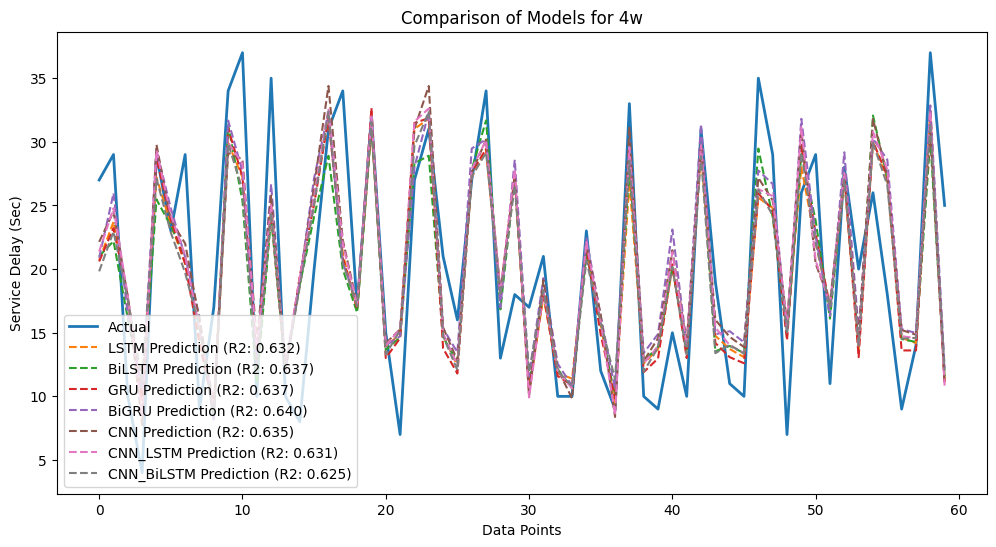

In [177]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 4w')
plt.show()

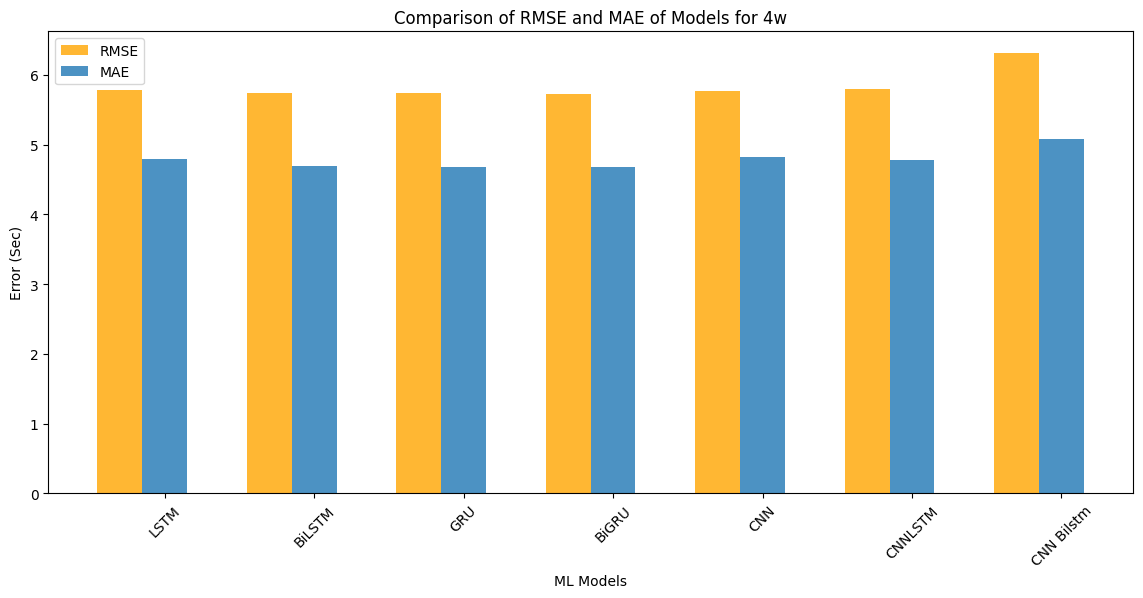

In [169]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 4w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()